<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkRP0321ENSkillsNetwork25371262-2021-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0101EN-Coursera/v2/M1_R_Basics/images/IDSNlogo.png" width="200" align="center">
</a>


<h1>Refine the Baseline Regression Models</h1>

Estimated time needed: **120** minutes


## Lab Overview:

Now you have built a baseline regression model with some relatively good RMSE and R-squared reported values. However, we could still improve it by using methods like adding polynomial and interaction terms, regularization, and so on.

In this lab, you will be asked to continue using `tidymodels` to improve the performance of baseline model:

*   **TASK: Add polynomial terms**
*   **TASK: Add interactions terms**
*   **TASK: Add regularizations terms**
*   **TASK: Experiment to search for improved models**

Let's start!


First install and import necessary libraries


In [1]:
# Check whether you need to install `rlang` and `tidymodels` libraries
# install.packages("rlang")
# install.packages("tidymodels")

In [1]:
library("tidymodels")
library("tidyverse")
library("stringr")

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

-- Attaching packages ------------------------------------------------------------------------------ tidymodels 0.1.4 --

v broom        0.7.11     v recipes      0.1.17
v dials        0.0.10     v rsample      0.1.1 
v dplyr        1.0.7      v tibble       3.1.6 
v ggplot2      3.3.5      v tidyr        1.1.4 
v infer        1.0.0      v tune         0.1.6 
v modeldata    0.1.1      v workflows    0.2.4 
v parsnip      0.1.7      v workflowsets 0.1.0 
v purrr        0.3.4      v yardstick    0.0.9 

-- Conflicts --------------------------------------------------------------------------------- tidymodels_conflicts() --
x purrr::discard() masks scales::discard()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()
x recipes::step()  masks stats::step()
* Learn how to get started at https://www.tidymodels.org/start/

-- Attaching packages ---------

The processed Seoul bike sharing dataset `seoul_bike_sharing_converted_normalized.csv`,  includes the converted indicator variables, and the numerical variables have been normalized.
Let's read it as a dataframe first:


In [2]:
# Dataset URL
dataset_url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing_converted_normalized.csv"
bike_sharing_df <- read_csv(dataset_url)
spec(bike_sharing_df)
write.csv(bike_sharing_df, file = 'bike_sharing_df_wk4.csv')

Rows: 8465 Columns: 41

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (2): DATE, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, ...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



cols(
  DATE = col_character(),
  RENTED_BIKE_COUNT = col_double(),
  TEMPERATURE = col_double(),
  HUMIDITY = col_double(),
  WIND_SPEED = col_double(),
  VISIBILITY = col_double(),
  DEW_POINT_TEMPERATURE = col_double(),
  SOLAR_RADIATION = col_double(),
  RAINFALL = col_double(),
  SNOWFALL = col_double(),
  FUNCTIONING_DAY = col_character(),
  `0` = col_double(),
  `1` = col_double(),
  `10` = col_double(),
  `11` = col_double(),
  `12` = col_double(),
  `13` = col_double(),
  `14` = col_double(),
  `15` = col_double(),
  `16` = col_double(),
  `17` = col_double(),
  `18` = col_double(),
  `19` = col_double(),
  `2` = col_double(),
  `20` = col_double(),
  `21` = col_double(),
  `22` = col_double(),
  `23` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double(),
  `8` = col_double(),
  `9` = col_double(),
  AUTUMN = col_double(),
  SPRING = col_double(),
  SUMMER = col_double(),
  WINTER = col_double(),
  HOLIDAY 

In [3]:
head(bike_sharing_df)
names(bike_sharing_df)
max(bike_sharing_df$RENTED_BIKE_COUNT)

DATE,RENTED_BIKE_COUNT,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,...,6,7,8,9,AUTUMN,SPRING,SUMMER,WINTER,HOLIDAY,NO_HOLIDAY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01/12/2017,254,0.2202797,0.3775510,0.2972973,1,0.2249135,0,0,0,...,0,0,0,0,0,0,0,1,0,1
01/12/2017,204,0.2150350,0.3877551,0.1081081,1,0.2249135,0,0,0,...,0,0,0,0,0,0,0,1,0,1
01/12/2017,173,0.2062937,0.3979592,0.1351351,1,0.2231834,0,0,0,...,0,0,0,0,0,0,0,1,0,1
01/12/2017,107,0.2027972,0.4081633,0.1216216,1,0.2249135,0,0,0,...,0,0,0,0,0,0,0,1,0,1
01/12/2017,78,0.2062937,0.3673469,0.3108108,1,0.2076125,0,0,0,...,0,0,0,0,0,0,0,1,0,1
01/12/2017,100,0.1993007,0.3775510,0.2027027,1,0.2058824,0,0,0,...,0,0,0,0,0,0,0,1,0,1


[1] "DATE"                  "RENTED_BIKE_COUNT"     "TEMPERATURE"          
 [4] "HUMIDITY"              "WIND_SPEED"            "VISIBILITY"           
 [7] "DEW_POINT_TEMPERATURE" "SOLAR_RADIATION"       "RAINFALL"             
[10] "SNOWFALL"              "FUNCTIONING_DAY"       "0"                    
[13] "1"                     "10"                    "11"                   
[16] "12"                    "13"                    "14"                   
[19] "15"                    "16"                    "17"                   
[22] "18"                    "19"                    "2"                    
[25] "20"                    "21"                    "22"                   
[28] "23"                    "3"                     "4"                    
[31] "5"                     "6"                     "7"                    
[34] "8"                     "9"                     "AUTUMN"               
[37] "SPRING"                "SUMMER"                "WINTER"               
[40] "HOLIDAY"               "NO_HOLIDAY"

[1] 3556

We won't be using the `DATE` column, because 'as is', it basically acts like an data entry index. (However, given more time, we could use the `DATE` colum to create a 'day of week' or 'isWeekend' column, which we might expect has an affect on preferred bike rental times.) We also do not need the `FUNCTIONAL DAY` column because it only has one distinct value remaining (`YES`) after missing value processing.


In [4]:
bike_sharing_df <- bike_sharing_df %>% 
                   select(-DATE, -FUNCTIONING_DAY)

Define a linear regression model specification.


In [5]:
lm_spec <- linear_reg() %>%
  set_engine("lm") %>% set_mode("regression")

Split the data into training and testing datasets.


In [6]:
set.seed(1234)
data_split <- initial_split(bike_sharing_df, prop = 4/5)
train_data <- training(data_split)
test_data <- testing(data_split)

Now we are ready to refine the previous baseline regression model.


# TASK: Add polynomial terms


Linear regression models are the most suitable models to capture the linear correlations among variables. However, in real world data, many relationships may be non-linear.


For example, the correlation between `RENTED_BIKE_COUNT` and `TEMPERATURE` does not look like linear:


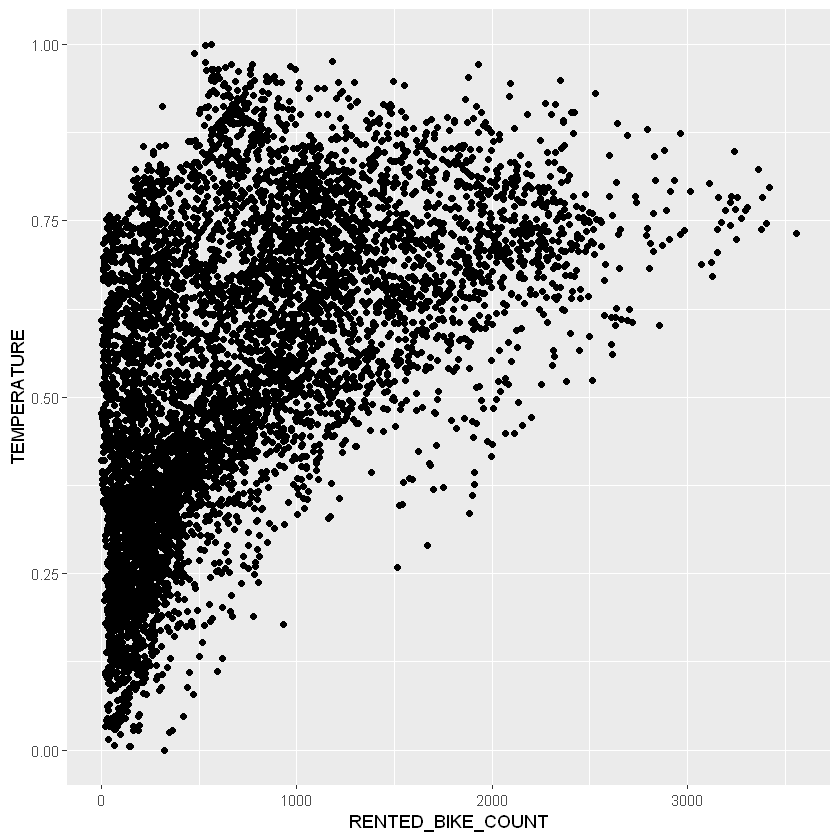

In [7]:
ggplot(data = train_data, aes(RENTED_BIKE_COUNT, TEMPERATURE)) + 
    geom_point() 

One solution to handle such nonlinearity is using polynomial regression by adding polynomial terms. As shown before, higher order polynomials are better than the first order polynomial.  

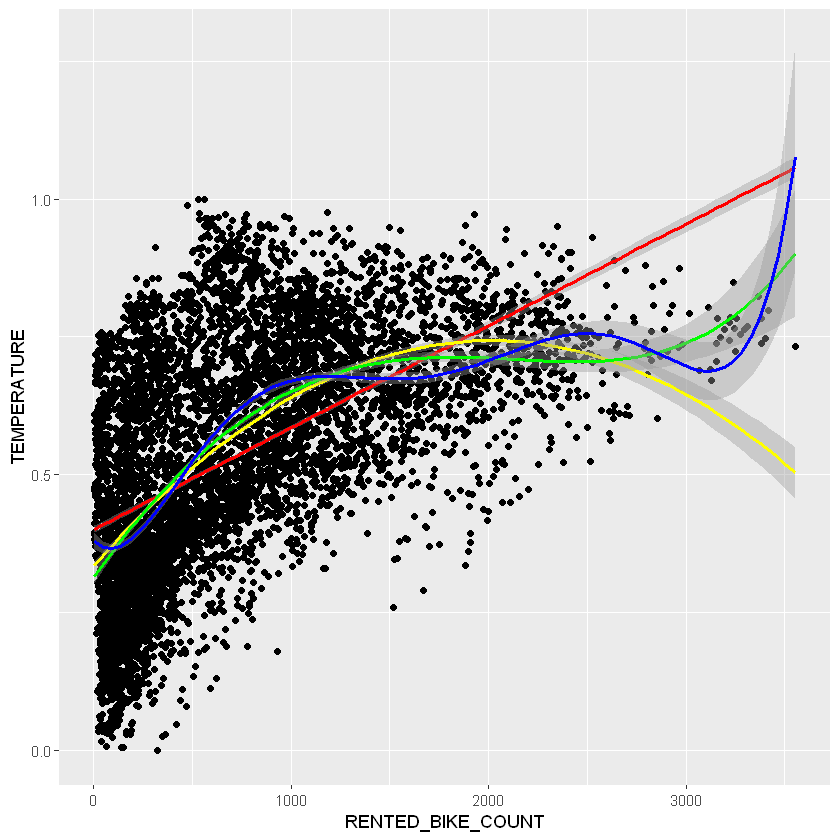

In [8]:
# Plot the higher order polynomial fits
ggplot(data=train_data, aes(RENTED_BIKE_COUNT, TEMPERATURE)) + 
    geom_point() + 
    geom_smooth(method = "lm", formula = y ~ x, color="red") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 2), color="yellow") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 4), color="green") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 6), color="blue")

OK, let's add some higher order polynomials of important variables to the regression models


*TODO:* Fit a linear regression model `lm_poly` with higher order polynomial terms on the important variables (larger coefficients) found in the baseline model


In [9]:
# Fit a linear model with higher order polynomial on some important variables

# #HINT: Use ploy function to build polynomial terms, lm_poly <- RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) + poly(HUMIDITY, 4) .....
lm_poly <- fit(lm_spec, RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) + poly(HUMIDITY, 4) + 
                              poly(RAINFALL, 6) + poly(DEW_POINT_TEMPERATURE, 6), data = train_data)

In [10]:
# Print model summary

summary(lm_poly$fit) %>% tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),734.8506,5.482162,134.0439412,0.000000e+00
"poly(TEMPERATURE, 6)1",53946.6724,5940.897634,9.0805592,1.395137e-19
"poly(TEMPERATURE, 6)2",2377.4759,857.743230,2.7717805,5.590339e-03
"poly(TEMPERATURE, 6)3",-10046.7085,630.538869,-15.9335276,3.879539e-56
"poly(TEMPERATURE, 6)4",-5774.4634,578.266134,-9.9858232,2.550830e-23
"poly(TEMPERATURE, 6)5",-671.7640,529.450673,-1.2687942,2.045582e-01
"poly(TEMPERATURE, 6)6",871.6173,501.987041,1.7363342,8.255039e-02
"poly(HUMIDITY, 4)1",-4858.9010,2856.777142,-1.7008330,8.902041e-02
"poly(HUMIDITY, 4)2",-6568.9643,673.639725,-9.7514503,2.551844e-22


*TODO:* Make predictions on test dataset using the `lm_poly` models


In [11]:
# Use predict() function to generate test results for `lm_poly`
lm_poly_results <- predict(lm_poly, new_data = test_data) %>% mutate(truth = test_data$RENTED_BIKE_COUNT)
head(lm_poly_results)

.pred,truth
<dbl>,<dbl>
207.53799,100
201.86537,181
275.38616,360
155.06787,405
54.33823,328
502.96541,479


Another minor improvement we could do here is to convert all negative prediction results to zero, because we can not have negative rented bike counts


In [12]:
# e.g., test_results[test_results<0] <- 0
lm_poly_results[lm_poly_results<0] <- 0

Now, calculate R-squared and RMSE for the test results generated by `lm_ploy` model


In [13]:
# Calculate R-squared and RMSE from the test results
rsq_lm_poly <- rsq(lm_poly_results, estimate = .pred, truth = truth)
rsq_lm_poly
rmse_lm_poly <- rmse(lm_poly_results, estimate = .pred, truth = truth)
rmse_lm_poly

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.5156957


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,440.4805


If you include all variables, and additionally include some of the more important ones as higher order poly terms, then you should notice improved  `R-squared` and `RMSE` values.


# TASK: Add interaction terms


In real-world scenarios, in addition to non-linear relationships between response variables and predictor variables, you may also encounter relationships among variables called `interaction effects`.

For example, the effect of predictor variable `TEMPERATURE` on `RENTED_BIKE_COUNT` may also depend on other variables such as `HUMIDITY`, `RAINFALL`, or both (they `interact`) and the effect of `SEASON` on `RENTED_BIKE_COUNT` may also depend on `HOLIDAY`, `HOUR`, or both.

To capture such interaction effects, we could add some interaction terms such as `RAINFALL*HUMIDITY` to the regression model, similar to what we did with polynominal terms. In this task, you will explore and conduct some experiments to search for interaction terms which will improve the model performance.


*TODO:* Try adding some interaction terms to the previous polynomial models.


In [14]:
# Add interaction terms to the poly regression built in previous step
######QUESTION: SOME CATEGORICAL VARIABLES NOT FOUND IN INTERACTIVE (NO_HOLIDAY*HOLIDAY WORKS)
# HINT: You could use `*` operator to create interaction terms such as HUMIDITY*TEMPERATURE and make the formula look like:
# RENTED_BIKE_COUNT ~ RAINFALL*HUMIDITY ...
lm_poly2 <- fit(lm_spec, RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) + poly(HUMIDITY, 4) + 
                              poly(RAINFALL, 6) + poly(DEW_POINT_TEMPERATURE, 6) + 
                (RAINFALL*HUMIDITY*DEW_POINT_TEMPERATURE*SOLAR_RADIATION) + (SNOWFALL*WIND_SPEED*TEMPERATURE*DEW_POINT_TEMPERATURE) + 
                (TEMPERATURE*HOLIDAY) + (TEMPERATURE*NO_HOLIDAY*SNOWFALL), data = train_data)

In [15]:
# Print model summary
summary(lm_poly2$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) + 
    poly(HUMIDITY, 4) + poly(RAINFALL, 6) + poly(DEW_POINT_TEMPERATURE, 
    6) + (RAINFALL * HUMIDITY * DEW_POINT_TEMPERATURE * SOLAR_RADIATION) + 
    (SNOWFALL * WIND_SPEED * TEMPERATURE * DEW_POINT_TEMPERATURE) + 
    (TEMPERATURE * HOLIDAY) + (TEMPERATURE * NO_HOLIDAY * SNOWFALL), 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1583.13  -212.66   -41.93   151.82  2011.40 

Coefficients: (6 not defined because of singularities)
                                                          Estimate Std. Error
(Intercept)                                              5.177e+03  2.045e+03
poly(TEMPERATURE, 6)1                                    1.215e+05  3.858e+04
poly(TEMPERATURE, 6)2                                    2.692e+04  9.534e+03
poly(TEMPERATURE, 6)3                                   -1.033e+04  7.369e+02
poly(TEMPERATURE, 6)4                                   -5.692e+03  5.933e

In [16]:
# Calculate R-squared and RMSE for the new model to see if performance has improved
poly_fit2_results <- predict(lm_poly2, new_data = test_data) %>% mutate(truth = test_data$RENTED_BIKE_COUNT)
#No -ve bike counts
poly_fit2_results[poly_fit2_results<0] <- 0
rsq_lm_poly2 <- rsq(poly_fit2_results, estimate = .pred, truth = truth)
rsq_lm_poly2
rmse_lm_poly2 <- rmse(poly_fit2_results, estimate = .pred, truth = truth)
rmse_lm_poly2

#prediction on model
 head(poly_fit2_results)

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.5642076


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,417.8259


.pred,truth
<dbl>,<dbl>
210.8902,100
210.4953,181
271.1789,360
245.9657,405
207.2855,328
494.0317,479


# TASK: Add regularization


In previous tasks, you were asked to add polynominal and interaction terms to the model, aiming to capture nonlinearity and interaction effects between the predictor variables. Hopefully, your updated models have better R-squared and RMSE values.

However, adding these terms makes your model more complicated, more difficult to explain, and more likely to suffer from overfitting. To overcome these issues, one solution is to add regularization terms to your models.


When building the baseline model, we used the basic `lm` engine. In this task, you will use a more advanced and generalized `glmnet` engine. It provides a generalized linear model with Lasso, Ridge, and Elastic Net regularizations.

In general, using `glmnet` can enhance your models in the following ways:

*   Address overfitting issues by shrinking the coefficients
*   Address predictor variable colinearity by selecting only one variable from each group of colinear variables (by shrinking their coefficients to zero)
*   Make your models more interpretable due to simplification (fewer variables in the outcome models)


Now, let's switch our regression engine to `glmnet`


*TODO:* Define a linear regression model specification `glmnet_spec` using `glmnet` engine


In [17]:
# HINT: Use linear_reg() function with two parameters: penalty and mixture
# - penalty controls the intensity of model regularization
# - mixture controls the tradeoff between L1 and L2 regularizations

#using fit_resamples
bike_sharing_folds <- vfold_cv(train_data, v = 20)
bike_recipe <- recipe(RENTED_BIKE_COUNT ~., data = train_data)

bike_poly_recipe <- bike_recipe  %>% step_poly(TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, DEW_POINT_TEMPERATURE, SOLAR_RADIATION, RAINFALL, SNOWFALL, 3) %>% step_interact(~all_predictors():all_predictors())

#lm_resamples_results <- fit_resamples(lm_spec,
#                                     preprocessor = bike_recipe,
#                                     resamples = bike_sharing_folds)
#lm_resamples_results %>% collect_metrics()

# You could manually try different parameter combinations or use grid search to find optimal combinations


Fit a glmnet model called  `lm_glmnet` using the `fit()` function. For the formula part, keep the polynominal and interaction terms you used in the previous task.


In [18]:
library('glmnet')
library('rlang')

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-3


Attaching package: 'rlang'


The following objects are masked from 'package:purrr':

    %@%, as_function, flatten, flatten_chr, flatten_dbl, flatten_int,
    flatten_lgl, flatten_raw, invoke, list_along, modify, prepend,
    splice




In [19]:
# Fit a glmnet model using the fit() function
ridge_spec <- linear_reg(penalty = 0.2, mixture = 0) %>% set_engine("glmnet") %>% set_mode("regression")                
ridge_wk_flow <- workflow() %>% add_recipe(bike_recipe) %>% add_model(ridge_spec)
ridge_fit <- ridge_wk_flow %>% fit(data = train_data)
#ridge_fit %>%  extract_fit_parsnip() %>% tidy() 
results_ridge <- predict(ridge_fit, new_data = test_data) %>% mutate(truth = test_data$RENTED_BIKE_COUNT)
head(results_ridge)

.pred,truth
<dbl>,<dbl>
-159.156532,100
-6.970481,181
242.965109,360
479.071540,405
-49.451539,328
304.677203,479


In [20]:
# Report rsq and rmse of the `lm_glmnet` model

print("=====================First ridge rmse and sqr=====================")
results_ridge[results_ridge<0] <- 0
ridge_rsq <- rsq(results_ridge, estimate = .pred, truth = truth)
ridge_rsq
ridge_rmse <- rmse(results_ridge, estimate = .pred, truth = truth)
ridge_rmse
head(results_ridge)

#LASSO
print("=====================First lasso rmse and sqr=====================")
lasso_spec <- linear_reg(penalty = 0.1, mixture = 1) %>% 
            set_engine("glmnet") %>% set_mode("regression")
lasso_wk_flow <- workflow() %>% add_recipe(bike_recipe) %>% add_model(lasso_spec)
lasso_fit <- fit(lasso_wk_flow, data = train_data)
lasso_bike_results <- predict(lasso_fit, new_data = test_data) %>% mutate(truth = test_data$RENTED_BIKE_COUNT)
# Save their rmse and rsq values
lasso_bike_results[lasso_bike_results<0] <- 0
lasso_rmse <- rmse(lasso_bike_results, estimate = .pred, truth = truth )
lasso_rsq <- rsq(lasso_bike_results, estimate = .pred, truth = truth)
head(lasso_bike_results)
lasso_rmse
lasso_rsq

[1] "=====================First ridge rmse and sqr====================="


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.6877656


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,357.7981


.pred,truth
<dbl>,<dbl>
0.0000,100
0.0000,181
242.9651,360
479.0715,405
0.0000,328
304.6772,479


[1] "=====================First lasso rmse and sqr====================="


.pred,truth
<dbl>,<dbl>
0.0000,100
0.0000,181
233.4524,360
468.1995,405
0.0000,328
291.1765,479


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,355.2204


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.6893515


# TASK: Experiment to search for improved models


Now you understand some of the methods that you can use to try to improve your models.


*TODO:* Experiment by building and testing at least five different models. For each of your experiments, include polynomial terms, interaction terms, and one of the three regularizations we introduced.


In [21]:
# Build at least five different models using polynomial terms, interaction terms, and regularizations.

# controlled resampling for tune_fit() to enable collect_predictions() 
ctrl <- control_resamples(save_pred = TRUE)


In [22]:
#1. ELASTIC NET

print("====================#1 ELASTIC NET PENALTY= 0.2, MIXTURE = 0.1========================")

enet_spec <- linear_reg(penalty = 0.2, mixture = 0.1) %>% set_engine("glmnet") %>% set_mode("regression")
enet_wk_flow <- workflow() %>% add_recipe(bike_recipe) %>% add_model(enet_spec)

enet_fit <- enet_wk_flow %>% fit(data = train_data)
enet_fit_results <- predict(enet_fit, new_data = test_data) %>% mutate(truth = test_data$RENTED_BIKE_COUNT)
#head(enet_fit_results)
# Save their rmse and rsq values
#enet_fit_results$.pred[enet_fit_results$.pred<0] <- 0   ##Or below code:
enet_fit_results[enet_fit_results<0] <- 0
#head(enet_fit_results)
enet_fit_rmse <- rmse(enet_fit_results, estimate = .pred, truth = truth )
enet_fit_rsq <- rsq(enet_fit_results, estimate = .pred, truth = truth)
enet_fit_rmse
enet_fit_rsq

[1] "====================#1 ELASTIC NET PENALTY= 0.2, MIXTURE = 0.1========================"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,355.2939


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.6893919


In [23]:
print("====================#2 LAST_FIT SLR========================")

##2. LAST_FIT and lm_spec - simple linear model
ls_fit <- last_fit(lm_spec,
                  preprocessor = bike_recipe,
                  split = data_split)

ls_fit %>% collect_metrics()

[1] "====================#2 LAST_FIT SLR========================"


! train/test split: preprocessor 1/1, model 1/1 (predictions): prediction from a rank-defici...



.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
rmse,standard,363.7368771,Preprocessor1_Model1
rsq,standard,0.6697276,Preprocessor1_Model1


In [24]:
##3. GRID penalty TUNING a. Lasso
print("====================#3 LASSO TUNED========================")
lasso_tune_spec <- linear_reg(penalty = tune(), mixture = 1) %>% set_engine("glmnet") %>% set_mode("regression")
lambda_grid1 <- grid_regular(levels = 40, penalty(range = c(-3, 0.3)))
lasso_tune_fit <- tune_grid(lasso_tune_spec,
                               preprocessor = bike_recipe,
                              grid = lambda_grid1,
                              resamples = bike_sharing_folds,
                              control = ctrl)

lasso_tune_fit %>% show_best(metric = 'rmse')

[1] "====================#3 LASSO TUNED========================"


penalty,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
0.419833339,rmse,standard,377.5560,20,4.987556,Preprocessor1_Model32
0.345510729,rmse,standard,377.5567,20,4.989452,Preprocessor1_Model31
0.510143442,rmse,standard,377.5576,20,4.985329,Preprocessor1_Model33
0.001000000,rmse,standard,377.5605,20,4.989914,Preprocessor1_Model01
0.001215109,rmse,standard,377.5605,20,4.989914,Preprocessor1_Model02


In [25]:
##4. GRID penalty TUNING b. ridge
print("====================#4 GRID TUNED========================")

ridge_tune_spec <- linear_reg(penalty = tune(), mixture = 0) %>% set_engine("glmnet") %>% set_mode("regression")
lambda_grid2 <- grid_regular(levels = 40, penalty(range = c(-3, 0.3)))
ridge_tune_fit <- tune_grid(ridge_tune_spec,
                           preprocessor = bike_recipe,
                          grid = lambda_grid2,
                          resamples = bike_sharing_folds,
                           control = ctrl)

ridge_tune_fit %>% show_best(metric = 'rmse')

[1] "====================#4 GRID TUNED========================"


penalty,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
0.001000000,rmse,standard,378.2619,20,5.025171,Preprocessor1_Model01
0.001215109,rmse,standard,378.2619,20,5.025171,Preprocessor1_Model02
0.001476491,rmse,standard,378.2619,20,5.025171,Preprocessor1_Model03
0.001794098,rmse,standard,378.2619,20,5.025171,Preprocessor1_Model04
0.002180025,rmse,standard,378.2619,20,5.025171,Preprocessor1_Model05


In [26]:
##5. GRID tune, tune both mixture and penalty AND CONTROL_RESAMPLES
print("====================#5 ELASTIC NET========================")

enet_tune_spec <- linear_reg(penalty = tune(), mixture = tune()) %>% set_engine("glmnet") %>% set_mode("regression")

lamda_grid_expand <- expand_grid(penalty = seq(0, 100, by = 10), 
                            mixture = seq(0, 1, by = 0.2))

enet_tune_fit <- tune_grid(enet_tune_spec,
                          preprocessor = bike_poly_recipe,
                          grid = lamda_grid_expand,
                          resamples = bike_sharing_folds,
                          control = ctrl)

[1] "====================#5 ELASTIC NET========================"


In [27]:
print("====================#6 ENET RESULTS PENALTY= 0.2, MIXTURE = 0.1=======================")
enet_results <- predict(enet_fit, new_data = test_data) %>% mutate(truth = test_data$RENTED_BIKE_COUNT)
enet_rmse <- rmse(enet_results, estimate = .pred, truth = truth)
enet_rmse

enet_rsq <- rsq(enet_results, estimate = .pred, truth = truth)
enet_rsq

enet_tune_fit %>% show_best('rsq')
enet_tune_fit %>% show_best('rmse')

[1] "====================#6 ENET RESULTS PENALTY= 0.2, MIXTURE = 0.1======================="


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,364.0183


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.66927


penalty,mixture,.metric,.estimator,mean,n,std_err,.config
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,0.2,rsq,standard,0.8397926,20,0.006458795,Preprocessor1_Model13
10,0.4,rsq,standard,0.8355800,20,0.006054257,Preprocessor1_Model24
20,0.2,rsq,standard,0.8348379,20,0.006133350,Preprocessor1_Model14
100,0.0,rsq,standard,0.8342157,20,0.008584827,Preprocessor1_Model11
90,0.0,rsq,standard,0.8338636,20,0.008963158,Preprocessor1_Model10


penalty,mixture,.metric,.estimator,mean,n,std_err,.config
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,0.2,rmse,standard,257.4155,20,4.358168,Preprocessor1_Model13
10,0.4,rmse,standard,261.4385,20,3.971628,Preprocessor1_Model24
100,0.0,rmse,standard,261.7702,20,5.594296,Preprocessor1_Model11
90,0.0,rmse,standard,261.9884,20,5.903759,Preprocessor1_Model10
20,0.2,rmse,standard,262.2180,20,4.022189,Preprocessor1_Model14


In [28]:
# Report the best performed model in terms of rmse and rsq
print("==========Best model RMSE===============")
best_rmse <-enet_tune_fit %>% show_best("rmse", n = 1)
best_rmse

print("==========Best model RSQ===============")
best_rsq <-enet_tune_fit %>% show_best("rsq", n = 1)
best_rsq

[1] "==========Best model RMSE==============="


penalty,mixture,.metric,.estimator,mean,n,std_err,.config
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,0.2,rmse,standard,257.4155,20,4.358168,Preprocessor1_Model13


[1] "==========Best model RSQ==============="


penalty,mixture,.metric,.estimator,mean,n,std_err,.config
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,0.2,rsq,standard,0.8397926,20,0.006458795,Preprocessor1_Model13


Here are the performance requirements for your best model:

*   The RMSE should be less than 330 (rougly 10% of the max value in test dataset)
*   R-squared should be greater than 0.72


*TODO:* Visualize the saved RMSE and R-squared values using a grouped barchart


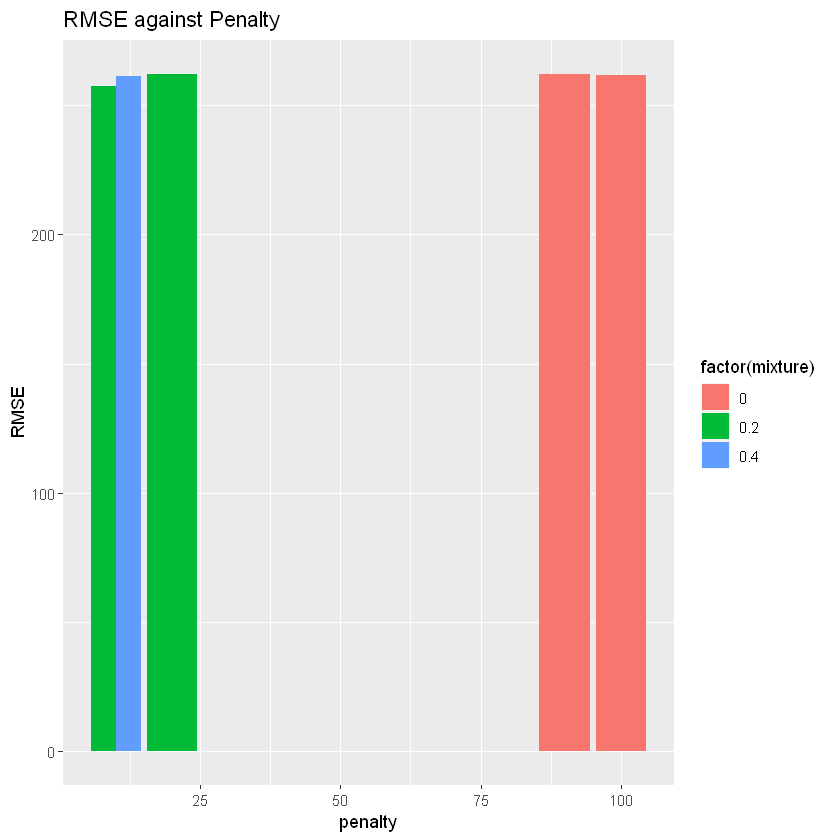

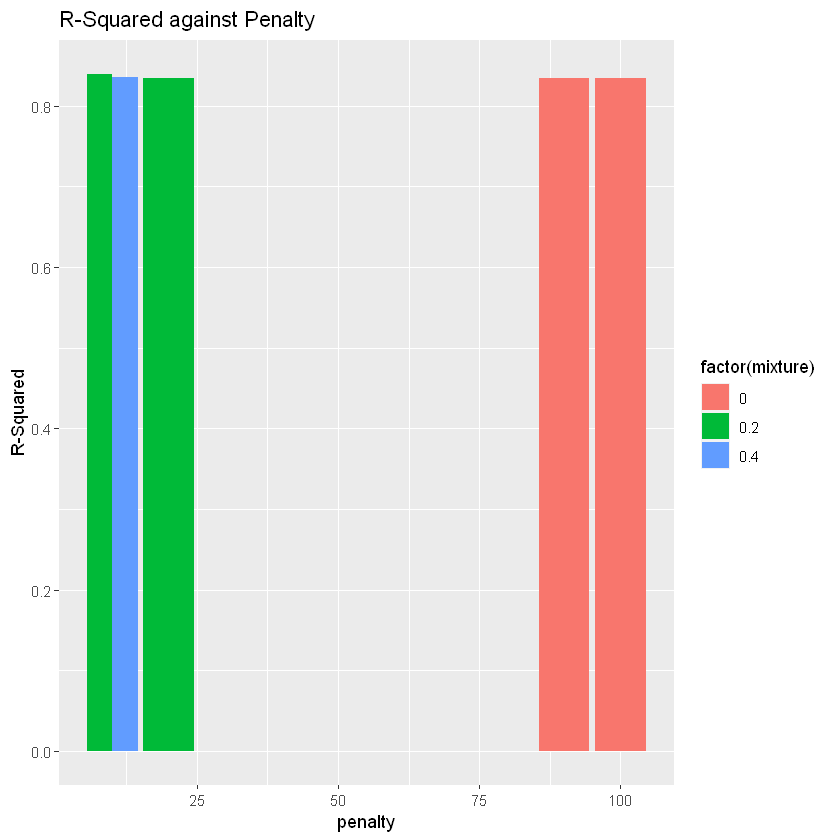

In [31]:
# HINT: Use ggplot() + geom_bar()
enet_tune_fit %>% show_best("rmse") %>% ggplot(aes(x = penalty, y = mean, fill = factor(mixture))) + geom_bar(stat = "identity", position = "dodge") +
            labs(title = "RMSE against Penalty", y = "RMSE")

enet_tune_fit %>% show_best("rsq") %>% ggplot(aes(x = penalty, y = mean, fill = factor(mixture))) + geom_bar(stat = "identity", position = "dodge") +
            labs(title = "R-Squared against Penalty", y = "R-Squared")


*TODO:* Create a Q-Q plot by plotting the distribution difference between the predictions generated by your best model and the true values on the test dataset.

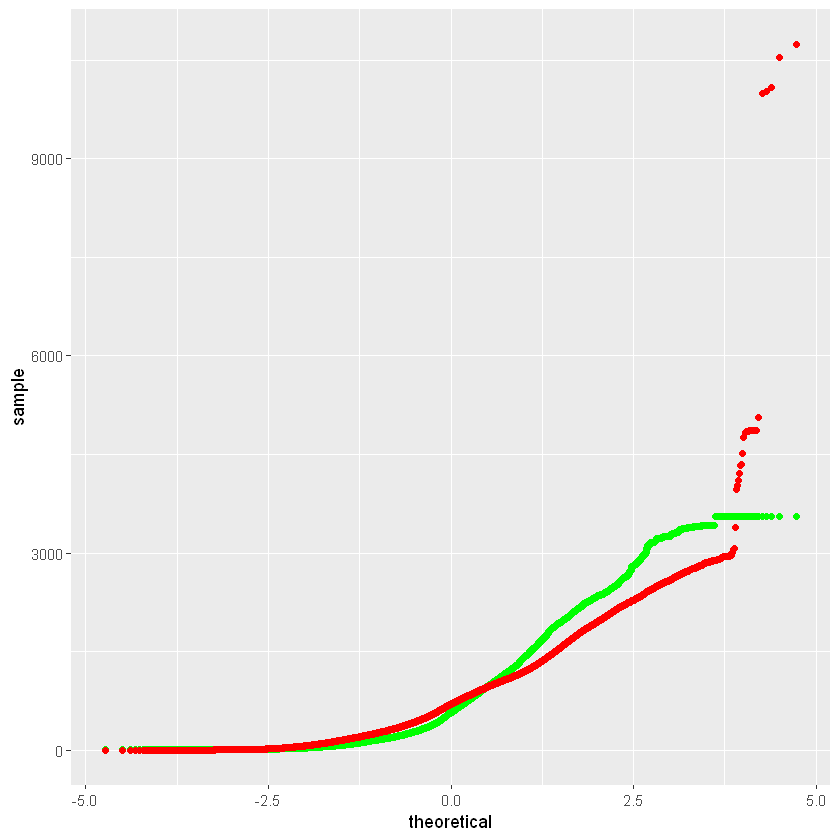

In [32]:
# HINT: Use ggplot() +
    # stat_qq(aes(sample=truth), color='green') +
    # stat_qq(aes(sample=prediction), color='red')

bike_pred_truth <- enet_tune_fit %>% collect_predictions() %>% filter(!.pred < 0)

bike_pred_truth %>% ggplot() +
     stat_qq(aes(sample=RENTED_BIKE_COUNT), color='green') +
     stat_qq(aes(sample=.pred), color='red')

In [33]:
best_spec <- linear_reg(penalty = 10, mixture = 0.2) %>% set_engine("glmnet") %>% set_mode("regression")

last_model <- last_fit(best_spec,
                      preprocessor = bike_poly_recipe,
                      split = data_split)

best_metric <- last_model %>% collect_metrics()
print("====================BEST METRICS FROM last_fit() REFINEMENT BEST TUNING PARAMETERS========================")
best_metric

last_model_pred <- last_model %>% collect_predictions()
#Check for negative predictions
#count(last_model_pred)
#last_model_pred$.pred[last_model_pred$.pred<0] <- 0
#count(last_model_pred )
head(last_model_pred)

[1] "====================BEST METRICS FROM last_fit() REFINEMENT BEST TUNING PARAMETERS========================"


.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
rmse,standard,243.2363577,Preprocessor1_Model1
rsq,standard,0.8534239,Preprocessor1_Model1


id,.pred,.row,RENTED_BIKE_COUNT,.config
<chr>,<dbl>,<int>,<dbl>,<chr>
train/test split,34.52178,6,100,Preprocessor1_Model1
train/test split,145.02060,7,181,Preprocessor1_Model1
train/test split,251.42612,12,360,Preprocessor1_Model1
train/test split,211.79466,22,405,Preprocessor1_Model1
train/test split,206.29025,25,328,Preprocessor1_Model1
train/test split,384.48977,37,479,Preprocessor1_Model1


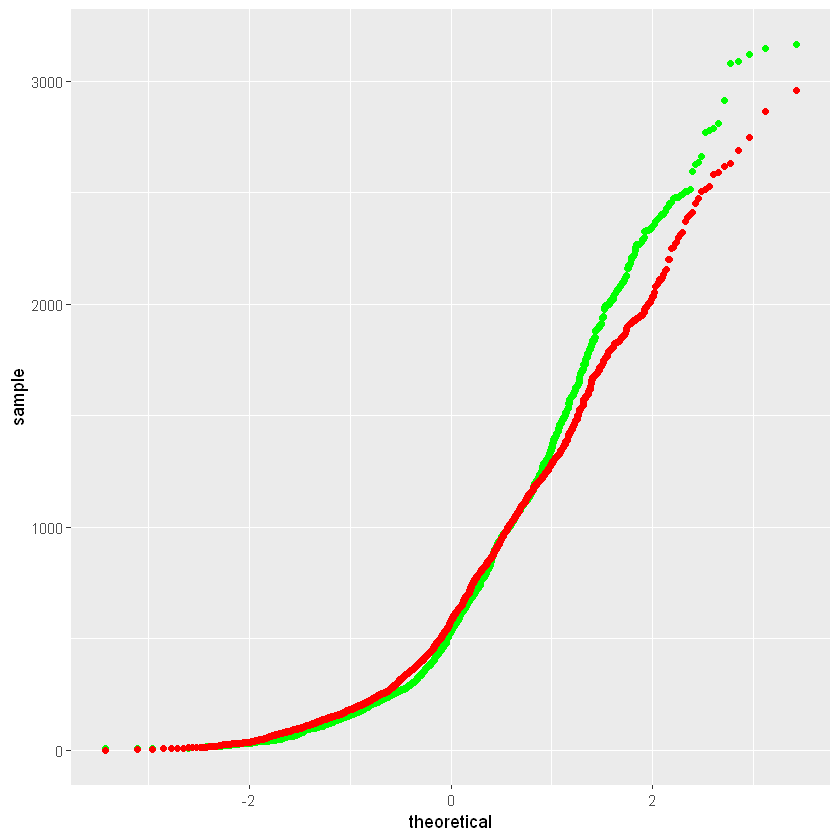

In [34]:
bike_pred_plot <- last_model_pred %>% filter(!.pred < 0) %>%
                                            ggplot() +
                                             stat_qq(aes(sample=RENTED_BIKE_COUNT), color='green') +
                                             stat_qq(aes(sample=.pred), color='red')
bike_pred_plot

One example of such Q-Q plot may look like this:


<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkRP0321ENSkillsNetwork25371262-2021-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/module_4/images/example_qq_plot.png" width="600" align="center">
</a>


# More model improvment methods beyond this course


In addition to the methods mentioned in this lab and previous data analysis courses, you could also explore to try the following methods yourself to see if they could improve model performance:

*   Remove potential redundant variables. If two variables have extremly high correlated, it is possible that they are redundant and could be removed from the model to improve the performance.
*   Remove some outliers. Linear regression models are very sensitive to outliers, you could try to remove some outliers to see if it would improve performance
*   Apply logarithm transformation. In case variable distributions are not normal distribution such as log-normal distribution, you could apply logaritm transformation on the variable to make them more look like normal distribution. In addition, logarithm transformation helps capture the non-linear relationships.

If you have time, you could research and try more methods by searching related research papers/articles, discussion forums, etc. If you know how to use other machine learning models with `Tidymodels` such as Neural Networks, Tree models, or Boosting models, you can also try and compare them with the linear regression models.


# Next Steps:


Great! You have improved your baseline model using polynomial terms, interaction terms, and regularizations, and have found your best model.

Now it's time to build an interactive dashboard to provide more interactive user-interactions.


## Authors

<a href="https://www.linkedin.com/in/yan-luo-96288783/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkRP0321ENSkillsNetwork25371262-2021-01-01" target="_blank">Yan Luo</a>


### Other Contributors

Jeff Grossman


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-04-08        | 1.0     | Yan        | Initial version created |
|                   |         |            |                         |
|                   |         |            |                         |

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
